# Kaggle Facial Keypoints Detection

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

In [75]:
#!pip install --upgrade --no-cache-dir gdown

In [76]:
#!gdown https://drive.google.com/uc?id=1Ee3qKH7aUpB3eUQP-nUiJyJECoTzVAU1

In [77]:
#!unzip facial-keypoints-detection.zip

In [78]:
df = pd.read_csv('facial-keypoints-detection/training.csv')
df.shape

(7049, 31)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [80]:
df.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [81]:
df = df.dropna()

In [82]:
df_image = df['Image']
df_image[0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [83]:
len(np.fromstring(df_image[0], dtype = 'int', sep = ' '))

9216

In [84]:
df['Image'] = df['Image'].apply(lambda x : np.fromstring(x, dtype='int', sep=' ').reshape(96, 96))

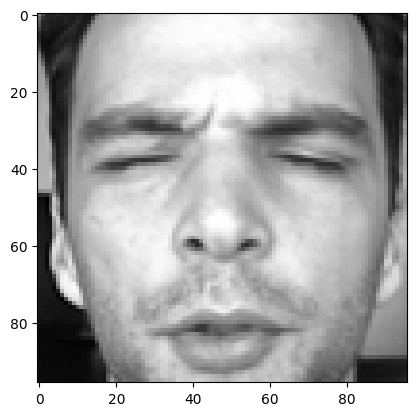

In [85]:
plt.imshow(df['Image'][125], cmap='gray')
plt.show()

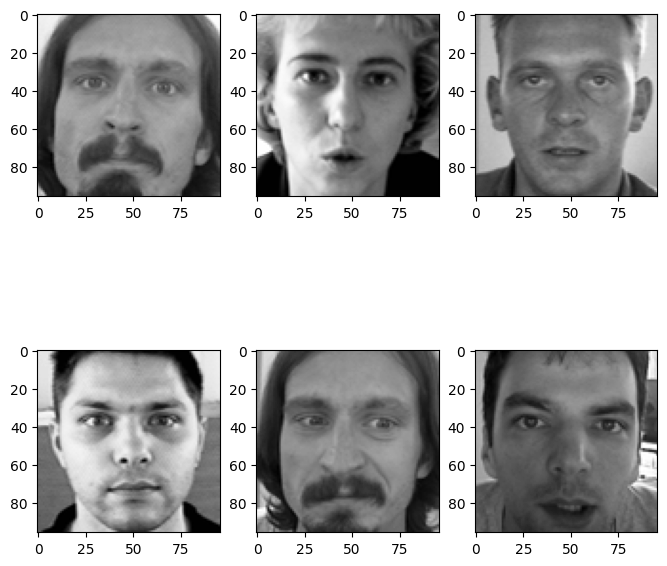

In [86]:
plt.figure(figsize = (8, 8))
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(df['Image'][i], cmap = 'gray')
plt.show()

Training:   0%|           0/15 ETA: ?s,  ?epochs/s
54/54██████████ ETA: 00:00s - loss: 1.6047 - mse: 1.6047


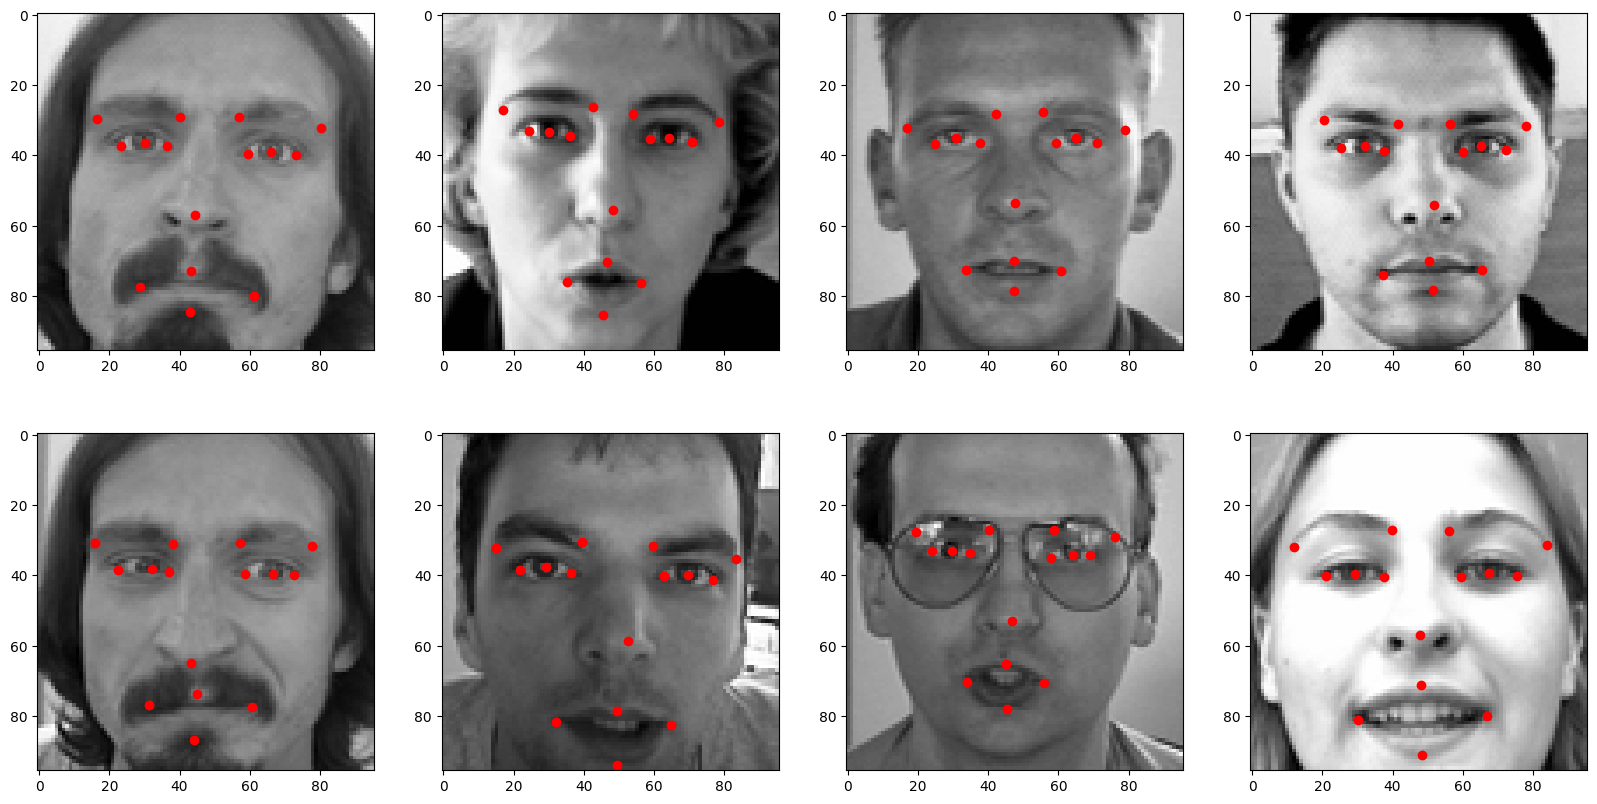

In [87]:
# Facial Keypoints 표시

plt.figure(figsize = (20, 10))
for idx in range(8):
  plt.subplot(2, 4, idx+1)
  plt.imshow(df['Image'][idx], cmap = 'gray')
  for j in range(1, 31, 2):
    plt.plot(df.loc[idx][j-1], df.loc[idx][j], 'ro')
plt.show()

In [88]:
df.shape

(2140, 31)

In [89]:
images = []

for i in range(df.shape[0]):
  img = df.iloc[i, -1]
  images.append(img)

images = np.array(images)
images.shape

(2140, 96, 96)

In [90]:
y_data = df.drop('Image', axis = 1)
y_data.shape

(2140, 30)

In [91]:
#!pip install scikit-learn

In [92]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(images, y_data,
                                                  test_size = 0.2)

print(x_train.shape, x_val.shape)

(1712, 96, 96) (428, 96, 96)


In [93]:
# 이미지 정규화
x_train = x_train.astype('float')/255.
x_val = x_val.astype('float')/255.

In [94]:
x_train = x_train.reshape(-1, 96, 96, 1)
x_val = x_val.reshape(-1, 96, 96, 1)

In [95]:
x_train.shape

(1712, 96, 96, 1)

In [96]:
def build_model():
  model = keras.Sequential([
      layers.Conv2D(32, (3,3), padding = 'same', use_bias = False, input_shape = (96, 96, 1)),
      layers.ReLU(),
      layers.BatchNormalization(), 

      layers.Conv2D(32, (3,3), padding ='same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(64, (3,3), padding ='same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),

      layers.Conv2D(64, (3,3), padding ='same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(96, (3,3), padding ='same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),

      layers.Conv2D(96, (3,3), padding ='same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(128, (3,3), padding ='same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),

      layers.Conv2D(128, (3,3), padding ='same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(256, (3,3), padding ='same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),

      layers.Conv2D(256, (3,3), padding ='same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Flatten(),
      layers.Dense(512, activation = 'relu'),
      layers.Dense(30) # activation은 없다, 좌표값을 받기위해 regression을 쓰기 때문.
  ])

  return model

In [97]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 96, 96, 32)        288       
                                                                 
 re_lu_20 (ReLU)             (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_20 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 96, 96, 32)        9216      
                                                                 
 re_lu_21 (ReLU)             (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_21 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                     

In [98]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = 'mse'
)

In [99]:
#!pip install -U tensorflow-addons

In [100]:
print(x_train.shape, y_train.shape)

(1712, 96, 96, 1) (1712, 30)


In [101]:
import tqdm
import tensorflow_addons as tfa

tqdm_callback = tfa.callbacks.TQDMProgressBar()

EPOCHS = 15
BATCH_SIZE = 32

log = model.fit(x_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                callbacks=[tqdm_callback],
                validation_data = (x_val, y_val),
                verbose = 1)

Training:   0%|           0/15 ETA: ?s,  ?epochs/s

Epoch 1/15



0/54           ETA: ?s - 

Epoch 1/15



1/54▏          ETA: 04:11s - loss: 2673.4998 - mse: 2673.4998

 3/54 [>.............................] - ETA: 2s - loss: 1974.9269 - mse: 1974.9269  


4/54▋          ETA: 00:46s - loss: 2153.7340 - mse: 2153.7340

 5/54 [=>............................] - ETA: 1s - loss: 1416.8845 - mse: 1416.8845


7/54█▎         ETA: 00:21s - loss: 1756.1180 - mse: 1756.1180

 9/54 [====>.........................] - ETA: 1s - loss: 845.8886 - mse: 845.8886  


10/54█▊         ETA: 00:11s - loss: 1484.3816 - mse: 1484.3816

11/54 [=====>........................] - ETA: 1s - loss: 702.7795 - mse: 702.7795


13/54██▍        ETA: 00:07s - loss: 1292.5310 - mse: 1292.5310

15/54 [=======>......................] - ETA: 1s - loss: 531.5097 - mse: 531.5097


16/54██▉        ETA: 00:04s - loss: 1150.1385 - mse: 1150.1385

17/54 [========>.....................] - ETA: 1s - loss: 474.6981 - mse: 474.6981


19/54███▌       ETA: 00:03s - loss: 1039.6962 - mse: 1039.6962

21/54 [==========>...................] - ETA: 1s - loss: 389.8151 - mse: 389.8151


22/54████       ETA: 00:02s - loss: 951.1937 - mse: 951.1937  

23/54 [===========>..................] - ETA: 1s - loss: 359.9203 - mse: 359.9203


25/54████▋      ETA: 00:01s - loss: 878.6380 - mse: 878.6380

27/54 [==============>...............] - ETA: 1s - loss: 311.5331 - mse: 311.5331


28/54█████▏     ETA: 00:01s - loss: 817.8908 - mse: 817.8908

29/54 [===============>..............] - ETA: 0s - loss: 291.6636 - mse: 291.6636


31/54█████▋     ETA: 00:01s - loss: 766.1134 - mse: 766.1134

33/54 [=================>............] - ETA: 0s - loss: 258.8296 - mse: 258.8296


34/54██████▎    ETA: 00:00s - loss: 721.3631 - mse: 721.3631

35/54 [==================>...........] - ETA: 0s - loss: 245.0300 - mse: 245.0300


37/54██████▊    ETA: 00:00s - loss: 682.2430 - mse: 682.2430

39/54 [====================>.........] - ETA: 0s - loss: 221.6785 - mse: 221.6785


40/54███████▍   ETA: 00:00s - loss: 647.7064 - mse: 647.7064

41/54 [=====================>........] - ETA: 0s - loss: 211.4771 - mse: 211.4771


43/54███████▉   ETA: 00:00s - loss: 616.9481 - mse: 616.9481

45/54 [========================>.....] - ETA: 0s - loss: 193.9767 - mse: 193.9767


46/54████████▌  ETA: 00:00s - loss: 589.3654 - mse: 589.3654

47/54 [=========================>....] - ETA: 0s - loss: 186.2569 - mse: 186.2569


49/54█████████  ETA: 00:00s - loss: 564.4669 - mse: 564.4669

51/54 [===========================>..] - ETA: 0s - loss: 172.5854 - mse: 172.5854


52/54█████████▋ ETA: 00:00s - loss: 541.8607 - mse: 541.8607

53/54 [============================>.] - ETA: 0s - loss: 166.4694 - mse: 166.4694


54/54██████████ ETA: 00:00s - loss: 165.0020 - mse: 165.0020 - val_loss: 725.3024 - val_mse: 725.3024
Training:   7%|▋          1/15 ETA: 01:41s,   7.24s/epochs

54/54 [==============================] - 7s 46ms/step - loss: 165.0020 - mse: 165.0020 - val_loss: 725.3024 - val_mse: 725.3024
Epoch 2/15



0/54           ETA: ?s - 

Epoch 2/15
 3/54 [>.............................] - ETA: 1s - loss: 9.2094 - mse: 9.2094  


4/54▋          ETA: 00:01s - loss: 10.0711 - mse: 10.0711

 5/54 [=>............................] - ETA: 1s - loss: 10.1128 - mse: 10.1128


7/54█▎         ETA: 00:01s - loss: 10.1409 - mse: 10.1409

 9/54 [====>.........................] - ETA: 1s - loss: 10.0170 - mse: 10.0170


10/54█▊         ETA: 00:01s - loss: 10.1298 - mse: 10.1298

11/54 [=====>........................] - ETA: 1s - loss: 9.9738 - mse: 9.9738  


13/54██▍        ETA: 00:01s - loss: 10.0851 - mse: 10.0851

15/54 [=======>......................] - ETA: 1s - loss: 9.8450 - mse: 9.8450


16/54██▉        ETA: 00:01s - loss: 10.0412 - mse: 10.0412

17/54 [========>.....................] - ETA: 1s - loss: 9.7586 - mse: 9.7586


19/54███▌       ETA: 00:01s - loss: 10.0058 - mse: 10.0058

21/54 [==========>...................] - ETA: 1s - loss: 10.2240 - mse: 10.2240


22/54████       ETA: 00:01s - loss: 10.0235 - mse: 10.0235

23/54 [===========>..................] - ETA: 1s - loss: 10.0502 - mse: 10.0502


25/54████▋      ETA: 00:01s - loss: 10.0224 - mse: 10.0224

27/54 [==============>...............] - ETA: 1s - loss: 9.8266 - mse: 9.8266 


28/54█████▏     ETA: 00:00s - loss: 10.0024 - mse: 10.0024

29/54 [===============>..............] - ETA: 0s - loss: 9.7851 - mse: 9.7851


31/54█████▋     ETA: 00:00s - loss: 9.9788 - mse: 9.9788  

33/54 [=================>............] - ETA: 0s - loss: 9.9514 - mse: 9.9514


34/54██████▎    ETA: 00:00s - loss: 9.9696 - mse: 9.9696

35/54 [==================>...........] - ETA: 0s - loss: 9.8003 - mse: 9.8003


37/54██████▊    ETA: 00:00s - loss: 9.9531 - mse: 9.9531

39/54 [====================>.........] - ETA: 0s - loss: 9.6396 - mse: 9.6396


40/54███████▍   ETA: 00:00s - loss: 9.9283 - mse: 9.9283

41/54 [=====================>........] - ETA: 0s - loss: 9.5675 - mse: 9.5675


43/54███████▉   ETA: 00:00s - loss: 9.8986 - mse: 9.8986

45/54 [========================>.....] - ETA: 0s - loss: 9.3402 - mse: 9.3402


46/54████████▌  ETA: 00:00s - loss: 9.8619 - mse: 9.8619

47/54 [=========================>....] - ETA: 0s - loss: 9.2456 - mse: 9.2456


49/54█████████  ETA: 00:00s - loss: 9.8217 - mse: 9.8217

51/54 [===========================>..] - ETA: 0s - loss: 9.0646 - mse: 9.0646


52/54█████████▋ ETA: 00:00s - loss: 9.7776 - mse: 9.7776

53/54 [============================>.] - ETA: 0s - loss: 8.9652 - mse: 8.9652


54/54██████████ ETA: 00:00s - loss: 8.9797 - mse: 8.9797 - val_loss: 252.7100 - val_mse: 252.7100
Training:  13%|█▎         2/15 ETA: 00:55s,   4.30s/epochs

54/54 [==============================] - 2s 41ms/step - loss: 8.9797 - mse: 8.9797 - val_loss: 252.7100 - val_mse: 252.7100
Epoch 3/15



0/54           ETA: ?s - 

Epoch 3/15
 3/54 [>.............................] - ETA: 1s - loss: 7.4012 - mse: 7.4012


4/54▋          ETA: 00:01s - loss: 7.3445 - mse: 7.3445

 5/54 [=>............................] - ETA: 1s - loss: 7.0510 - mse: 7.0510


7/54█▎         ETA: 00:01s - loss: 7.2225 - mse: 7.2225

 9/54 [====>.........................] - ETA: 1s - loss: 7.2827 - mse: 7.2827


10/54█▊         ETA: 00:01s - loss: 7.1964 - mse: 7.1964

11/54 [=====>........................] - ETA: 1s - loss: 7.3947 - mse: 7.3947


13/54██▍        ETA: 00:01s - loss: 7.2093 - mse: 7.2093

15/54 [=======>......................] - ETA: 1s - loss: 6.9401 - mse: 6.9401


16/54██▉        ETA: 00:01s - loss: 7.1550 - mse: 7.1550

17/54 [========>.....................] - ETA: 1s - loss: 6.8400 - mse: 6.8400


19/54███▌       ETA: 00:01s - loss: 7.0933 - mse: 7.0933

21/54 [==========>...................] - ETA: 1s - loss: 6.7418 - mse: 6.7418


22/54████       ETA: 00:01s - loss: 7.0413 - mse: 7.0413

23/54 [===========>..................] - ETA: 1s - loss: 6.6975 - mse: 6.6975


25/54████▋      ETA: 00:01s - loss: 7.0002 - mse: 7.0002

27/54 [==============>...............] - ETA: 1s - loss: 6.7296 - mse: 6.7296


28/54█████▏     ETA: 00:00s - loss: 6.9688 - mse: 6.9688

29/54 [===============>..............] - ETA: 0s - loss: 6.7265 - mse: 6.7265


31/54█████▋     ETA: 00:00s - loss: 6.9442 - mse: 6.9442

33/54 [=================>............] - ETA: 0s - loss: 6.6754 - mse: 6.6754


34/54██████▎    ETA: 00:00s - loss: 6.9190 - mse: 6.9190

35/54 [==================>...........] - ETA: 0s - loss: 6.5740 - mse: 6.5740


37/54██████▊    ETA: 00:00s - loss: 6.8884 - mse: 6.8884

39/54 [====================>.........] - ETA: 0s - loss: 6.4150 - mse: 6.4150


40/54███████▍   ETA: 00:00s - loss: 6.8535 - mse: 6.8535

41/54 [=====================>........] - ETA: 0s - loss: 6.3328 - mse: 6.3328


43/54███████▉   ETA: 00:00s - loss: 6.8150 - mse: 6.8150

45/54 [========================>.....] - ETA: 0s - loss: 6.2398 - mse: 6.2398


46/54████████▌  ETA: 00:00s - loss: 6.7778 - mse: 6.7778

47/54 [=========================>....] - ETA: 0s - loss: 6.2187 - mse: 6.2187


49/54█████████  ETA: 00:00s - loss: 6.7410 - mse: 6.7410

51/54 [===========================>..] - ETA: 0s - loss: 6.0909 - mse: 6.0909


52/54█████████▋ ETA: 00:00s - loss: 6.7035 - mse: 6.7035

53/54 [============================>.] - ETA: 0s - loss: 6.0336 - mse: 6.0336


54/54██████████ ETA: 00:00s - loss: 6.0417 - mse: 6.0417 - val_loss: 161.0007 - val_mse: 161.0007
Training:  20%|██         3/15 ETA: 00:40s,   3.38s/epochs

54/54 [==============================] - 2s 42ms/step - loss: 6.0417 - mse: 6.0417 - val_loss: 161.0007 - val_mse: 161.0007
Epoch 4/15



0/54           ETA: ?s - 

Epoch 4/15
 3/54 [>.............................] - ETA: 1s - loss: 4.9732 - mse: 4.9732


4/54▋          ETA: 00:01s - loss: 5.2555 - mse: 5.2555

 5/54 [=>............................] - ETA: 1s - loss: 5.4097 - mse: 5.4097


7/54█▎         ETA: 00:01s - loss: 5.3885 - mse: 5.3885

 9/54 [====>.........................] - ETA: 1s - loss: 5.6477 - mse: 5.6477


10/54█▊         ETA: 00:01s - loss: 5.4535 - mse: 5.4535

11/54 [=====>........................] - ETA: 1s - loss: 5.5103 - mse: 5.5103


13/54██▍        ETA: 00:01s - loss: 5.4513 - mse: 5.4513

15/54 [=======>......................] - ETA: 1s - loss: 5.3126 - mse: 5.3126


16/54██▉        ETA: 00:01s - loss: 5.4296 - mse: 5.4296

17/54 [========>.....................] - ETA: 1s - loss: 5.3521 - mse: 5.3521


19/54███▌       ETA: 00:01s - loss: 5.4093 - mse: 5.4093

21/54 [==========>...................] - ETA: 1s - loss: 5.3052 - mse: 5.3052


22/54████       ETA: 00:01s - loss: 5.3921 - mse: 5.3921

23/54 [===========>..................] - ETA: 1s - loss: 5.2473 - mse: 5.2473


25/54████▋      ETA: 00:01s - loss: 5.3784 - mse: 5.3784

27/54 [==============>...............] - ETA: 0s - loss: 5.2458 - mse: 5.2458


28/54█████▏     ETA: 00:00s - loss: 5.3665 - mse: 5.3665

29/54 [===============>..............] - ETA: 0s - loss: 5.2591 - mse: 5.2591


31/54█████▋     ETA: 00:00s - loss: 5.3578 - mse: 5.3578

33/54 [=================>............] - ETA: 0s - loss: 5.2670 - mse: 5.2670


34/54██████▎    ETA: 00:00s - loss: 5.3501 - mse: 5.3501

35/54 [==================>...........] - ETA: 0s - loss: 5.2392 - mse: 5.2392


37/54██████▊    ETA: 00:00s - loss: 5.3383 - mse: 5.3383

39/54 [====================>.........] - ETA: 0s - loss: 5.1390 - mse: 5.1390


40/54███████▍   ETA: 00:00s - loss: 5.3224 - mse: 5.3224

41/54 [=====================>........] - ETA: 0s - loss: 5.0676 - mse: 5.0676


43/54███████▉   ETA: 00:00s - loss: 5.3036 - mse: 5.3036

45/54 [========================>.....] - ETA: 0s - loss: 4.9828 - mse: 4.9828


46/54████████▌  ETA: 00:00s - loss: 5.2834 - mse: 5.2834

47/54 [=========================>....] - ETA: 0s - loss: 4.9811 - mse: 4.9811


49/54█████████  ETA: 00:00s - loss: 5.2677 - mse: 5.2677

51/54 [===========================>..] - ETA: 0s - loss: 5.0246 - mse: 5.0246


52/54█████████▋ ETA: 00:00s - loss: 5.2535 - mse: 5.2535

53/54 [============================>.] - ETA: 0s - loss: 4.9930 - mse: 4.9930


54/54██████████ ETA: 00:00s - loss: 5.0107 - mse: 5.0107 - val_loss: 239.2858 - val_mse: 239.2858
Training:  27%|██▋        4/15 ETA: 00:31s,   2.91s/epochs

54/54 [==============================] - 2s 40ms/step - loss: 5.0107 - mse: 5.0107 - val_loss: 239.2858 - val_mse: 239.2858
Epoch 5/15



0/54           ETA: ?s - 

Epoch 5/15
 3/54 [>.............................] - ETA: 1s - loss: 4.6558 - mse: 4.6558


4/54▋          ETA: 00:01s - loss: 4.8526 - mse: 4.8526

 5/54 [=>............................] - ETA: 1s - loss: 4.7451 - mse: 4.7451


7/54█▎         ETA: 00:01s - loss: 4.7824 - mse: 4.7824

 9/54 [====>.........................] - ETA: 1s - loss: 4.7296 - mse: 4.7296


10/54█▊         ETA: 00:01s - loss: 4.7648 - mse: 4.7648

11/54 [=====>........................] - ETA: 1s - loss: 4.5195 - mse: 4.5195


13/54██▍        ETA: 00:01s - loss: 4.6873 - mse: 4.6873

15/54 [=======>......................] - ETA: 1s - loss: 4.2672 - mse: 4.2672


16/54██▉        ETA: 00:01s - loss: 4.6157 - mse: 4.6157

17/54 [========>.....................] - ETA: 1s - loss: 4.3626 - mse: 4.3626


19/54███▌       ETA: 00:01s - loss: 4.5699 - mse: 4.5699

21/54 [==========>...................] - ETA: 1s - loss: 4.2195 - mse: 4.2195


22/54████       ETA: 00:01s - loss: 4.5241 - mse: 4.5241

23/54 [===========>..................] - ETA: 1s - loss: 4.2447 - mse: 4.2447


25/54████▋      ETA: 00:01s - loss: 4.4973 - mse: 4.4973

27/54 [==============>...............] - ETA: 0s - loss: 4.3539 - mse: 4.3539


28/54█████▏     ETA: 00:00s - loss: 4.4855 - mse: 4.4855

29/54 [===============>..............] - ETA: 0s - loss: 4.4259 - mse: 4.4259


31/54█████▋     ETA: 00:00s - loss: 4.4795 - mse: 4.4795

33/54 [=================>............] - ETA: 0s - loss: 4.4130 - mse: 4.4130


34/54██████▎    ETA: 00:00s - loss: 4.4740 - mse: 4.4740

35/54 [==================>...........] - ETA: 0s - loss: 4.4377 - mse: 4.4377


37/54██████▊    ETA: 00:00s - loss: 4.4722 - mse: 4.4722

39/54 [====================>.........] - ETA: 0s - loss: 4.4576 - mse: 4.4576


40/54███████▍   ETA: 00:00s - loss: 4.4712 - mse: 4.4712

41/54 [=====================>........] - ETA: 0s - loss: 4.4573 - mse: 4.4573


43/54███████▉   ETA: 00:00s - loss: 4.4702 - mse: 4.4702

45/54 [========================>.....] - ETA: 0s - loss: 4.4810 - mse: 4.4810


46/54████████▌  ETA: 00:00s - loss: 4.4699 - mse: 4.4699

47/54 [=========================>....] - ETA: 0s - loss: 4.4792 - mse: 4.4792


49/54█████████  ETA: 00:00s - loss: 4.4761 - mse: 4.4761

51/54 [===========================>..] - ETA: 0s - loss: 4.6587 - mse: 4.6587


52/54█████████▋ ETA: 00:00s - loss: 4.4857 - mse: 4.4857

53/54 [============================>.] - ETA: 0s - loss: 4.6294 - mse: 4.6294


54/54██████████ ETA: 00:00s - loss: 4.6422 - mse: 4.6422 - val_loss: 98.9035 - val_mse: 98.9035
Training:  33%|███▎       5/15 ETA: 00:26s,   2.63s/epochs

54/54 [==============================] - 2s 40ms/step - loss: 4.6422 - mse: 4.6422 - val_loss: 98.9035 - val_mse: 98.9035
Epoch 6/15



0/54           ETA: ?s - 

Epoch 6/15
 3/54 [>.............................] - ETA: 1s - loss: 3.7106 - mse: 3.7106


4/54▋          ETA: 00:01s - loss: 3.7837 - mse: 3.7837

 5/54 [=>............................] - ETA: 1s - loss: 3.9664 - mse: 3.9664


7/54█▎         ETA: 00:01s - loss: 3.8612 - mse: 3.8612

 9/54 [====>.........................] - ETA: 1s - loss: 3.8993 - mse: 3.8993


10/54█▊         ETA: 00:01s - loss: 3.8722 - mse: 3.8722

11/54 [=====>........................] - ETA: 1s - loss: 3.8923 - mse: 3.8923


13/54██▍        ETA: 00:01s - loss: 3.9314 - mse: 3.9314

15/54 [=======>......................] - ETA: 1s - loss: 4.2540 - mse: 4.2540


16/54██▉        ETA: 00:01s - loss: 3.9840 - mse: 3.9840

17/54 [========>.....................] - ETA: 1s - loss: 4.1743 - mse: 4.1743


19/54███▌       ETA: 00:01s - loss: 4.0267 - mse: 4.0267

21/54 [==========>...................] - ETA: 1s - loss: 4.3752 - mse: 4.3752


22/54████       ETA: 00:01s - loss: 4.0683 - mse: 4.0683

23/54 [===========>..................] - ETA: 1s - loss: 4.3593 - mse: 4.3593


25/54████▋      ETA: 00:01s - loss: 4.1022 - mse: 4.1022

27/54 [==============>...............] - ETA: 0s - loss: 4.3831 - mse: 4.3831


28/54█████▏     ETA: 00:00s - loss: 4.1297 - mse: 4.1297

29/54 [===============>..............] - ETA: 0s - loss: 4.2955 - mse: 4.2955


31/54█████▋     ETA: 00:00s - loss: 4.1454 - mse: 4.1454

33/54 [=================>............] - ETA: 0s - loss: 4.2677 - mse: 4.2677


34/54██████▎    ETA: 00:00s - loss: 4.1559 - mse: 4.1559

35/54 [==================>...........] - ETA: 0s - loss: 4.2323 - mse: 4.2323


37/54██████▊    ETA: 00:00s - loss: 4.1595 - mse: 4.1595

39/54 [====================>.........] - ETA: 0s - loss: 4.1498 - mse: 4.1498


40/54███████▍   ETA: 00:00s - loss: 4.1590 - mse: 4.1590

41/54 [=====================>........] - ETA: 0s - loss: 4.1347 - mse: 4.1347


43/54███████▉   ETA: 00:00s - loss: 4.1577 - mse: 4.1577

45/54 [========================>.....] - ETA: 0s - loss: 4.1302 - mse: 4.1302


46/54████████▌  ETA: 00:00s - loss: 4.1559 - mse: 4.1559

47/54 [=========================>....] - ETA: 0s - loss: 4.1382 - mse: 4.1382


49/54█████████  ETA: 00:00s - loss: 4.1549 - mse: 4.1549

51/54 [===========================>..] - ETA: 0s - loss: 4.1121 - mse: 4.1121


52/54█████████▋ ETA: 00:00s - loss: 4.1524 - mse: 4.1524

53/54 [============================>.] - ETA: 0s - loss: 4.0808 - mse: 4.0808


54/54██████████ ETA: 00:00s - loss: 4.0681 - mse: 4.0681 - val_loss: 136.9204 - val_mse: 136.9204
Training:  40%|████       6/15 ETA: 00:22s,   2.48s/epochs

54/54 [==============================] - 2s 40ms/step - loss: 4.0681 - mse: 4.0681 - val_loss: 136.9204 - val_mse: 136.9204
Epoch 7/15



0/54           ETA: ?s - 

Epoch 7/15
 3/54 [>.............................] - ETA: 1s - loss: 3.1964 - mse: 3.1964


4/54▋          ETA: 00:01s - loss: 3.1400 - mse: 3.1400

 5/54 [=>............................] - ETA: 1s - loss: 2.8781 - mse: 2.8781


7/54█▎         ETA: 00:01s - loss: 3.0287 - mse: 3.0287

 9/54 [====>.........................] - ETA: 1s - loss: 3.0139 - mse: 3.0139


10/54█▊         ETA: 00:01s - loss: 3.0205 - mse: 3.0205

11/54 [=====>........................] - ETA: 1s - loss: 3.0196 - mse: 3.0196


13/54██▍        ETA: 00:01s - loss: 3.0121 - mse: 3.0121

15/54 [=======>......................] - ETA: 1s - loss: 2.9149 - mse: 2.9149


16/54██▉        ETA: 00:01s - loss: 2.9937 - mse: 2.9937

17/54 [========>.....................] - ETA: 1s - loss: 2.8654 - mse: 2.8654


19/54███▌       ETA: 00:01s - loss: 2.9705 - mse: 2.9705

21/54 [==========>...................] - ETA: 1s - loss: 2.8682 - mse: 2.8682


22/54████       ETA: 00:01s - loss: 2.9583 - mse: 2.9583

23/54 [===========>..................] - ETA: 1s - loss: 2.9612 - mse: 2.9612


25/54████▋      ETA: 00:01s - loss: 2.9609 - mse: 2.9609

27/54 [==============>...............] - ETA: 0s - loss: 2.9970 - mse: 2.9970


28/54█████▏     ETA: 00:00s - loss: 2.9653 - mse: 2.9653

29/54 [===============>..............] - ETA: 0s - loss: 2.9887 - mse: 2.9887


31/54█████▋     ETA: 00:00s - loss: 2.9667 - mse: 2.9667

33/54 [=================>............] - ETA: 0s - loss: 3.0180 - mse: 3.0180


34/54██████▎    ETA: 00:00s - loss: 2.9692 - mse: 2.9692

35/54 [==================>...........] - ETA: 0s - loss: 3.0037 - mse: 3.0037


37/54██████▊    ETA: 00:00s - loss: 2.9722 - mse: 2.9722

39/54 [====================>.........] - ETA: 0s - loss: 3.0163 - mse: 3.0163


40/54███████▍   ETA: 00:00s - loss: 2.9757 - mse: 2.9757

41/54 [=====================>........] - ETA: 0s - loss: 3.0544 - mse: 3.0544


43/54███████▉   ETA: 00:00s - loss: 2.9812 - mse: 2.9812

45/54 [========================>.....] - ETA: 0s - loss: 3.0271 - mse: 3.0271


46/54████████▌  ETA: 00:00s - loss: 2.9844 - mse: 2.9844

47/54 [=========================>....] - ETA: 0s - loss: 3.0159 - mse: 3.0159


49/54█████████  ETA: 00:00s - loss: 2.9861 - mse: 2.9861

51/54 [===========================>..] - ETA: 0s - loss: 2.9943 - mse: 2.9943


52/54█████████▋ ETA: 00:00s - loss: 2.9870 - mse: 2.9870

53/54 [============================>.] - ETA: 0s - loss: 2.9931 - mse: 2.9931


54/54██████████ ETA: 00:00s - loss: 3.0107 - mse: 3.0107 - val_loss: 44.0367 - val_mse: 44.0367
Training:  47%|████▋      7/15 ETA: 00:19s,   2.39s/epochs

54/54 [==============================] - 2s 41ms/step - loss: 3.0107 - mse: 3.0107 - val_loss: 44.0367 - val_mse: 44.0367
Epoch 8/15



0/54           ETA: ?s - 

Epoch 8/15
 3/54 [>.............................] - ETA: 1s - loss: 2.3258 - mse: 2.3258


4/54▋          ETA: 00:01s - loss: 2.2868 - mse: 2.2868

 5/54 [=>............................] - ETA: 1s - loss: 2.6410 - mse: 2.6410


7/54█▎         ETA: 00:01s - loss: 2.5121 - mse: 2.5121

 9/54 [====>.........................] - ETA: 1s - loss: 3.1011 - mse: 3.1011


10/54█▊         ETA: 00:01s - loss: 2.6880 - mse: 2.6880

11/54 [=====>........................] - ETA: 1s - loss: 3.1507 - mse: 3.1507


13/54██▍        ETA: 00:01s - loss: 2.7886 - mse: 2.7886

15/54 [=======>......................] - ETA: 1s - loss: 3.0730 - mse: 3.0730


16/54██▉        ETA: 00:01s - loss: 2.8359 - mse: 2.8359

17/54 [========>.....................] - ETA: 1s - loss: 3.0640 - mse: 3.0640


19/54███▌       ETA: 00:01s - loss: 2.8685 - mse: 2.8685

21/54 [==========>...................] - ETA: 1s - loss: 2.9842 - mse: 2.9842


22/54████       ETA: 00:01s - loss: 2.8842 - mse: 2.8842

23/54 [===========>..................] - ETA: 1s - loss: 2.9345 - mse: 2.9345


25/54████▋      ETA: 00:01s - loss: 2.8881 - mse: 2.8881

27/54 [==============>...............] - ETA: 1s - loss: 2.8699 - mse: 2.8699


28/54█████▏     ETA: 00:00s - loss: 2.8865 - mse: 2.8865

29/54 [===============>..............] - ETA: 0s - loss: 2.8553 - mse: 2.8553


31/54█████▋     ETA: 00:00s - loss: 2.8840 - mse: 2.8840

33/54 [=================>............] - ETA: 0s - loss: 2.8495 - mse: 2.8495


34/54██████▎    ETA: 00:00s - loss: 2.8815 - mse: 2.8815

35/54 [==================>...........] - ETA: 0s - loss: 2.8849 - mse: 2.8849


37/54██████▊    ETA: 00:00s - loss: 2.8807 - mse: 2.8807

39/54 [====================>.........] - ETA: 0s - loss: 2.8709 - mse: 2.8709


40/54███████▍   ETA: 00:00s - loss: 2.8803 - mse: 2.8803

41/54 [=====================>........] - ETA: 0s - loss: 2.9134 - mse: 2.9134


43/54███████▉   ETA: 00:00s - loss: 2.8824 - mse: 2.8824

45/54 [========================>.....] - ETA: 0s - loss: 2.9241 - mse: 2.9241


46/54████████▌  ETA: 00:00s - loss: 2.8853 - mse: 2.8853

47/54 [=========================>....] - ETA: 0s - loss: 2.9064 - mse: 2.9064


49/54█████████  ETA: 00:00s - loss: 2.8865 - mse: 2.8865

51/54 [===========================>..] - ETA: 0s - loss: 2.9010 - mse: 2.9010


52/54█████████▋ ETA: 00:00s - loss: 2.8873 - mse: 2.8873

53/54 [============================>.] - ETA: 0s - loss: 2.8767 - mse: 2.8767


54/54██████████ ETA: 00:00s - loss: 2.8699 - mse: 2.8699 - val_loss: 21.5288 - val_mse: 21.5288
Training:  53%|█████▎     8/15 ETA: 00:16s,   2.34s/epochs

54/54 [==============================] - 2s 41ms/step - loss: 2.8699 - mse: 2.8699 - val_loss: 21.5288 - val_mse: 21.5288
Epoch 9/15



0/54           ETA: ?s - 

Epoch 9/15
 3/54 [>.............................] - ETA: 1s - loss: 2.1690 - mse: 2.1690


4/54▋          ETA: 00:01s - loss: 2.1933 - mse: 2.1933

 5/54 [=>............................] - ETA: 1s - loss: 2.3680 - mse: 2.3680


7/54█▎         ETA: 00:01s - loss: 2.3197 - mse: 2.3197

 9/54 [====>.........................] - ETA: 1s - loss: 2.6276 - mse: 2.6276


10/54█▊         ETA: 00:01s - loss: 2.4090 - mse: 2.4090

11/54 [=====>........................] - ETA: 1s - loss: 2.6648 - mse: 2.6648


13/54██▍        ETA: 00:01s - loss: 2.4566 - mse: 2.4566

15/54 [=======>......................] - ETA: 1s - loss: 2.5190 - mse: 2.5190


16/54██▉        ETA: 00:01s - loss: 2.4672 - mse: 2.4672

17/54 [========>.....................] - ETA: 1s - loss: 2.4681 - mse: 2.4681


19/54███▌       ETA: 00:01s - loss: 2.4709 - mse: 2.4709

21/54 [==========>...................] - ETA: 1s - loss: 2.4386 - mse: 2.4386


22/54████       ETA: 00:01s - loss: 2.4665 - mse: 2.4665

23/54 [===========>..................] - ETA: 1s - loss: 2.3755 - mse: 2.3755


25/54████▋      ETA: 00:01s - loss: 2.4566 - mse: 2.4566

27/54 [==============>...............] - ETA: 0s - loss: 2.4019 - mse: 2.4019


28/54█████▏     ETA: 00:00s - loss: 2.4505 - mse: 2.4505

29/54 [===============>..............] - ETA: 0s - loss: 2.3717 - mse: 2.3717


31/54█████▋     ETA: 00:00s - loss: 2.4423 - mse: 2.4423

33/54 [=================>............] - ETA: 0s - loss: 2.3504 - mse: 2.3504


34/54██████▎    ETA: 00:00s - loss: 2.4341 - mse: 2.4341

35/54 [==================>...........] - ETA: 0s - loss: 2.3264 - mse: 2.3264


37/54██████▊    ETA: 00:00s - loss: 2.4241 - mse: 2.4241

39/54 [====================>.........] - ETA: 0s - loss: 2.2978 - mse: 2.2978


40/54███████▍   ETA: 00:00s - loss: 2.4148 - mse: 2.4148

41/54 [=====================>........] - ETA: 0s - loss: 2.2942 - mse: 2.2942


43/54███████▉   ETA: 00:00s - loss: 2.4066 - mse: 2.4066

45/54 [========================>.....] - ETA: 0s - loss: 2.2926 - mse: 2.2926


46/54████████▌  ETA: 00:00s - loss: 2.3993 - mse: 2.3993

47/54 [=========================>....] - ETA: 0s - loss: 2.3036 - mse: 2.3036


49/54█████████  ETA: 00:00s - loss: 2.3939 - mse: 2.3939

51/54 [===========================>..] - ETA: 0s - loss: 2.3120 - mse: 2.3120


52/54█████████▋ ETA: 00:00s - loss: 2.3894 - mse: 2.3894

53/54 [============================>.] - ETA: 0s - loss: 2.3076 - mse: 2.3076


54/54██████████ ETA: 00:00s - loss: 2.3092 - mse: 2.3092 - val_loss: 14.5729 - val_mse: 14.5729
Training:  60%|██████     9/15 ETA: 00:13s,   2.29s/epochs

54/54 [==============================] - 2s 40ms/step - loss: 2.3092 - mse: 2.3092 - val_loss: 14.5729 - val_mse: 14.5729
Epoch 10/15



0/54           ETA: ?s - 

Epoch 10/15
 3/54 [>.............................] - ETA: 1s - loss: 2.0412 - mse: 2.0412


4/54▋          ETA: 00:01s - loss: 2.1572 - mse: 2.1572

 5/54 [=>............................] - ETA: 1s - loss: 2.0832 - mse: 2.0832


7/54█▎         ETA: 00:01s - loss: 2.1247 - mse: 2.1247

 9/54 [====>.........................] - ETA: 1s - loss: 2.2085 - mse: 2.2085


10/54█▊         ETA: 00:01s - loss: 2.1382 - mse: 2.1382

11/54 [=====>........................] - ETA: 1s - loss: 2.1003 - mse: 2.1003


13/54██▍        ETA: 00:01s - loss: 2.1205 - mse: 2.1205

15/54 [=======>......................] - ETA: 1s - loss: 2.0511 - mse: 2.0511


16/54██▉        ETA: 00:01s - loss: 2.1062 - mse: 2.1062

17/54 [========>.....................] - ETA: 1s - loss: 2.0665 - mse: 2.0665


19/54███▌       ETA: 00:01s - loss: 2.0996 - mse: 2.0996

21/54 [==========>...................] - ETA: 1s - loss: 2.0611 - mse: 2.0611


22/54████       ETA: 00:01s - loss: 2.0946 - mse: 2.0946

23/54 [===========>..................] - ETA: 1s - loss: 2.0517 - mse: 2.0517


25/54████▋      ETA: 00:01s - loss: 2.0886 - mse: 2.0886

27/54 [==============>...............] - ETA: 0s - loss: 2.0110 - mse: 2.0110


28/54█████▏     ETA: 00:00s - loss: 2.0821 - mse: 2.0821

29/54 [===============>..............] - ETA: 0s - loss: 2.0398 - mse: 2.0398


31/54█████▋     ETA: 00:00s - loss: 2.0794 - mse: 2.0794

33/54 [=================>............] - ETA: 0s - loss: 2.0568 - mse: 2.0568


34/54██████▎    ETA: 00:00s - loss: 2.0775 - mse: 2.0775

35/54 [==================>...........] - ETA: 0s - loss: 2.0378 - mse: 2.0378


37/54██████▊    ETA: 00:00s - loss: 2.0740 - mse: 2.0740

39/54 [====================>.........] - ETA: 0s - loss: 2.0193 - mse: 2.0193


40/54███████▍   ETA: 00:00s - loss: 2.0703 - mse: 2.0703

41/54 [=====================>........] - ETA: 0s - loss: 2.0264 - mse: 2.0264


43/54███████▉   ETA: 00:00s - loss: 2.0669 - mse: 2.0669

45/54 [========================>.....] - ETA: 0s - loss: 2.0218 - mse: 2.0218


46/54████████▌  ETA: 00:00s - loss: 2.0638 - mse: 2.0638

47/54 [=========================>....] - ETA: 0s - loss: 2.0142 - mse: 2.0142


49/54█████████  ETA: 00:00s - loss: 2.0610 - mse: 2.0610

51/54 [===========================>..] - ETA: 0s - loss: 2.0436 - mse: 2.0436


52/54█████████▋ ETA: 00:00s - loss: 2.0600 - mse: 2.0600

53/54 [============================>.] - ETA: 0s - loss: 2.0455 - mse: 2.0455


54/54██████████ ETA: 00:00s - loss: 2.0470 - mse: 2.0470 - val_loss: 13.1263 - val_mse: 13.1263
Training:  67%|██████▋    10/15 ETA: 00:11s,   2.26s/epochs

54/54 [==============================] - 2s 40ms/step - loss: 2.0470 - mse: 2.0470 - val_loss: 13.1263 - val_mse: 13.1263
Epoch 11/15



0/54           ETA: ?s - 

Epoch 11/15
 3/54 [>.............................] - ETA: 1s - loss: 2.0473 - mse: 2.0473


4/54▋          ETA: 00:01s - loss: 2.0535 - mse: 2.0535

 5/54 [=>............................] - ETA: 1s - loss: 2.0362 - mse: 2.0362


7/54█▎         ETA: 00:01s - loss: 2.0638 - mse: 2.0638

 9/54 [====>.........................] - ETA: 1s - loss: 2.0415 - mse: 2.0415


10/54█▊         ETA: 00:01s - loss: 2.0636 - mse: 2.0636

11/54 [=====>........................] - ETA: 1s - loss: 2.0467 - mse: 2.0467


13/54██▍        ETA: 00:01s - loss: 2.0594 - mse: 2.0594

15/54 [=======>......................] - ETA: 1s - loss: 2.0246 - mse: 2.0246


16/54██▉        ETA: 00:01s - loss: 2.0537 - mse: 2.0537

17/54 [========>.....................] - ETA: 1s - loss: 2.0513 - mse: 2.0513


19/54███▌       ETA: 00:01s - loss: 2.0529 - mse: 2.0529

21/54 [==========>...................] - ETA: 1s - loss: 2.0645 - mse: 2.0645


22/54████       ETA: 00:01s - loss: 2.0543 - mse: 2.0543

23/54 [===========>..................] - ETA: 1s - loss: 2.0878 - mse: 2.0878


25/54████▋      ETA: 00:01s - loss: 2.0557 - mse: 2.0557

27/54 [==============>...............] - ETA: 0s - loss: 2.0421 - mse: 2.0421


28/54█████▏     ETA: 00:00s - loss: 2.0545 - mse: 2.0545

29/54 [===============>..............] - ETA: 0s - loss: 2.0403 - mse: 2.0403


31/54█████▋     ETA: 00:00s - loss: 2.0532 - mse: 2.0532

33/54 [=================>............] - ETA: 0s - loss: 2.0284 - mse: 2.0284


34/54██████▎    ETA: 00:00s - loss: 2.0513 - mse: 2.0513

35/54 [==================>...........] - ETA: 0s - loss: 2.0270 - mse: 2.0270


37/54██████▊    ETA: 00:00s - loss: 2.0499 - mse: 2.0499

39/54 [====================>.........] - ETA: 0s - loss: 2.0603 - mse: 2.0603


40/54███████▍   ETA: 00:00s - loss: 2.0503 - mse: 2.0503

41/54 [=====================>........] - ETA: 0s - loss: 2.0619 - mse: 2.0619


43/54███████▉   ETA: 00:00s - loss: 2.0508 - mse: 2.0508

45/54 [========================>.....] - ETA: 0s - loss: 2.0815 - mse: 2.0815


46/54████████▌  ETA: 00:00s - loss: 2.0536 - mse: 2.0536

47/54 [=========================>....] - ETA: 0s - loss: 2.1334 - mse: 2.1334


49/54█████████  ETA: 00:00s - loss: 2.0584 - mse: 2.0584

51/54 [===========================>..] - ETA: 0s - loss: 2.1190 - mse: 2.1190


52/54█████████▋ ETA: 00:00s - loss: 2.0621 - mse: 2.0621

53/54 [============================>.] - ETA: 0s - loss: 2.1087 - mse: 2.1087


54/54██████████ ETA: 00:00s - loss: 2.1025 - mse: 2.1025 - val_loss: 3.8286 - val_mse: 3.8286
Training:  73%|███████▎   11/15 ETA: 00:08s,   2.24s/epochs

54/54 [==============================] - 2s 40ms/step - loss: 2.1025 - mse: 2.1025 - val_loss: 3.8286 - val_mse: 3.8286
Epoch 12/15



0/54           ETA: ?s - 

Epoch 12/15
 3/54 [>.............................] - ETA: 1s - loss: 1.6923 - mse: 1.6923


4/54▋          ETA: 00:01s - loss: 1.6932 - mse: 1.6932

 5/54 [=>............................] - ETA: 1s - loss: 1.9955 - mse: 1.9955


7/54█▎         ETA: 00:01s - loss: 1.8035 - mse: 1.8035

 9/54 [====>.........................] - ETA: 1s - loss: 1.8576 - mse: 1.8576


10/54█▊         ETA: 00:01s - loss: 1.8183 - mse: 1.8183

11/54 [=====>........................] - ETA: 1s - loss: 1.8640 - mse: 1.8640


13/54██▍        ETA: 00:01s - loss: 1.8266 - mse: 1.8266

15/54 [=======>......................] - ETA: 1s - loss: 1.8793 - mse: 1.8793


16/54██▉        ETA: 00:01s - loss: 1.8364 - mse: 1.8364

17/54 [========>.....................] - ETA: 1s - loss: 1.8774 - mse: 1.8774


19/54███▌       ETA: 00:01s - loss: 1.8456 - mse: 1.8456

21/54 [==========>...................] - ETA: 1s - loss: 1.9452 - mse: 1.9452


22/54████       ETA: 00:01s - loss: 1.8610 - mse: 1.8610

23/54 [===========>..................] - ETA: 1s - loss: 1.9582 - mse: 1.9582


25/54████▋      ETA: 00:01s - loss: 1.8708 - mse: 1.8708

27/54 [==============>...............] - ETA: 1s - loss: 1.9791 - mse: 1.9791


28/54█████▏     ETA: 00:00s - loss: 1.8808 - mse: 1.8808

29/54 [===============>..............] - ETA: 0s - loss: 1.9610 - mse: 1.9610


31/54█████▋     ETA: 00:00s - loss: 1.8896 - mse: 1.8896

33/54 [=================>............] - ETA: 0s - loss: 1.9592 - mse: 1.9592


34/54██████▎    ETA: 00:00s - loss: 1.8957 - mse: 1.8957

35/54 [==================>...........] - ETA: 0s - loss: 1.9563 - mse: 1.9563


37/54██████▊    ETA: 00:00s - loss: 1.9009 - mse: 1.9009

39/54 [====================>.........] - ETA: 0s - loss: 1.9496 - mse: 1.9496


40/54███████▍   ETA: 00:00s - loss: 1.9048 - mse: 1.9048

41/54 [=====================>........] - ETA: 0s - loss: 1.9888 - mse: 1.9888


43/54███████▉   ETA: 00:00s - loss: 1.9104 - mse: 1.9104

45/54 [========================>.....] - ETA: 0s - loss: 1.9653 - mse: 1.9653


46/54████████▌  ETA: 00:00s - loss: 1.9142 - mse: 1.9142

47/54 [=========================>....] - ETA: 0s - loss: 1.9575 - mse: 1.9575


49/54█████████  ETA: 00:00s - loss: 1.9168 - mse: 1.9168

51/54 [===========================>..] - ETA: 0s - loss: 1.9587 - mse: 1.9587


52/54█████████▋ ETA: 00:00s - loss: 1.9190 - mse: 1.9190

53/54 [============================>.] - ETA: 0s - loss: 1.9624 - mse: 1.9624


54/54██████████ ETA: 00:00s - loss: 1.9606 - mse: 1.9606 - val_loss: 3.7347 - val_mse: 3.7347
Training:  80%|████████   12/15 ETA: 00:06s,   2.23s/epochs

54/54 [==============================] - 2s 41ms/step - loss: 1.9606 - mse: 1.9606 - val_loss: 3.7347 - val_mse: 3.7347
Epoch 13/15



0/54           ETA: ?s - 

Epoch 13/15
 3/54 [>.............................] - ETA: 1s - loss: 1.9739 - mse: 1.9739


4/54▋          ETA: 00:01s - loss: 2.1316 - mse: 2.1316

 5/54 [=>............................] - ETA: 1s - loss: 1.8776 - mse: 1.8776


7/54█▎         ETA: 00:01s - loss: 2.0184 - mse: 2.0184

 9/54 [====>.........................] - ETA: 1s - loss: 1.8494 - mse: 1.8494


10/54█▊         ETA: 00:01s - loss: 1.9641 - mse: 1.9641

11/54 [=====>........................] - ETA: 1s - loss: 1.8985 - mse: 1.8985


13/54██▍        ETA: 00:01s - loss: 1.9542 - mse: 1.9542

15/54 [=======>......................] - ETA: 1s - loss: 1.9838 - mse: 1.9838


16/54██▉        ETA: 00:01s - loss: 1.9611 - mse: 1.9611

17/54 [========>.....................] - ETA: 1s - loss: 2.0324 - mse: 2.0324


19/54███▌       ETA: 00:01s - loss: 1.9735 - mse: 1.9735

21/54 [==========>...................] - ETA: 1s - loss: 2.0501 - mse: 2.0501


22/54████       ETA: 00:01s - loss: 1.9844 - mse: 1.9844

23/54 [===========>..................] - ETA: 1s - loss: 2.0384 - mse: 2.0384


25/54████▋      ETA: 00:01s - loss: 1.9922 - mse: 1.9922

27/54 [==============>...............] - ETA: 0s - loss: 2.0375 - mse: 2.0375


28/54█████▏     ETA: 00:00s - loss: 1.9966 - mse: 1.9966

29/54 [===============>..............] - ETA: 0s - loss: 2.0224 - mse: 2.0224


31/54█████▋     ETA: 00:00s - loss: 1.9990 - mse: 1.9990

33/54 [=================>............] - ETA: 0s - loss: 2.0068 - mse: 2.0068


34/54██████▎    ETA: 00:00s - loss: 2.0005 - mse: 2.0005

35/54 [==================>...........] - ETA: 0s - loss: 2.0152 - mse: 2.0152


37/54██████▊    ETA: 00:00s - loss: 2.0029 - mse: 2.0029

39/54 [====================>.........] - ETA: 0s - loss: 2.0396 - mse: 2.0396


40/54███████▍   ETA: 00:00s - loss: 2.0054 - mse: 2.0054

41/54 [=====================>........] - ETA: 0s - loss: 2.0425 - mse: 2.0425


43/54███████▉   ETA: 00:00s - loss: 2.0077 - mse: 2.0077

45/54 [========================>.....] - ETA: 0s - loss: 2.0313 - mse: 2.0313


46/54████████▌  ETA: 00:00s - loss: 2.0096 - mse: 2.0096

47/54 [=========================>....] - ETA: 0s - loss: 2.0623 - mse: 2.0623


49/54█████████  ETA: 00:00s - loss: 2.0141 - mse: 2.0141

51/54 [===========================>..] - ETA: 0s - loss: 2.1070 - mse: 2.1070


52/54█████████▋ ETA: 00:00s - loss: 2.0191 - mse: 2.0191

53/54 [============================>.] - ETA: 0s - loss: 2.0986 - mse: 2.0986


54/54██████████ ETA: 00:00s - loss: 2.1027 - mse: 2.1027 - val_loss: 3.3998 - val_mse: 3.3998
Training:  87%|████████▋  13/15 ETA: 00:04s,   2.23s/epochs

54/54 [==============================] - 2s 41ms/step - loss: 2.1027 - mse: 2.1027 - val_loss: 3.3998 - val_mse: 3.3998
Epoch 14/15



0/54           ETA: ?s - 

Epoch 14/15
 3/54 [>.............................] - ETA: 2s - loss: 2.1705 - mse: 2.1705


4/54▋          ETA: 00:01s - loss: 2.2789 - mse: 2.2789

 5/54 [=>............................] - ETA: 1s - loss: 2.2582 - mse: 2.2582


7/54█▎         ETA: 00:01s - loss: 2.2382 - mse: 2.2382

 9/54 [====>.........................] - ETA: 1s - loss: 2.1232 - mse: 2.1232


10/54█▊         ETA: 00:01s - loss: 2.2172 - mse: 2.2172

11/54 [=====>........................] - ETA: 1s - loss: 2.0945 - mse: 2.0945


13/54██▍        ETA: 00:01s - loss: 2.1932 - mse: 2.1932

15/54 [=======>......................] - ETA: 1s - loss: 2.0732 - mse: 2.0732


16/54██▉        ETA: 00:01s - loss: 2.1714 - mse: 2.1714

17/54 [========>.....................] - ETA: 1s - loss: 2.0577 - mse: 2.0577


19/54███▌       ETA: 00:01s - loss: 2.1532 - mse: 2.1532

21/54 [==========>...................] - ETA: 1s - loss: 2.0628 - mse: 2.0628


22/54████       ETA: 00:01s - loss: 2.1400 - mse: 2.1400

23/54 [===========>..................] - ETA: 1s - loss: 2.0850 - mse: 2.0850


25/54████▋      ETA: 00:01s - loss: 2.1342 - mse: 2.1342

27/54 [==============>...............] - ETA: 1s - loss: 2.0924 - mse: 2.0924


28/54█████▏     ETA: 00:00s - loss: 2.1298 - mse: 2.1298

29/54 [===============>..............] - ETA: 0s - loss: 2.0930 - mse: 2.0930


31/54█████▋     ETA: 00:00s - loss: 2.1255 - mse: 2.1255

33/54 [=================>............] - ETA: 0s - loss: 2.0812 - mse: 2.0812


34/54██████▎    ETA: 00:00s - loss: 2.1215 - mse: 2.1215

35/54 [==================>...........] - ETA: 0s - loss: 2.0782 - mse: 2.0782


37/54██████▊    ETA: 00:00s - loss: 2.1177 - mse: 2.1177

39/54 [====================>.........] - ETA: 0s - loss: 2.0575 - mse: 2.0575


40/54███████▍   ETA: 00:00s - loss: 2.1129 - mse: 2.1129

41/54 [=====================>........] - ETA: 0s - loss: 2.0361 - mse: 2.0361


43/54███████▉   ETA: 00:00s - loss: 2.1071 - mse: 2.1071

45/54 [========================>.....] - ETA: 0s - loss: 2.0198 - mse: 2.0198


46/54████████▌  ETA: 00:00s - loss: 2.1012 - mse: 2.1012

47/54 [=========================>....] - ETA: 0s - loss: 1.9995 - mse: 1.9995


49/54█████████  ETA: 00:00s - loss: 2.0950 - mse: 2.0950

51/54 [===========================>..] - ETA: 0s - loss: 1.9915 - mse: 1.9915


52/54█████████▋ ETA: 00:00s - loss: 2.0890 - mse: 2.0890

53/54 [============================>.] - ETA: 0s - loss: 1.9858 - mse: 1.9858


54/54██████████ ETA: 00:00s - loss: 1.9832 - mse: 1.9832 - val_loss: 3.6870 - val_mse: 3.6870
Training:  93%|█████████▎ 14/15 ETA: 00:02s,   2.23s/epochs

54/54 [==============================] - 2s 41ms/step - loss: 1.9832 - mse: 1.9832 - val_loss: 3.6870 - val_mse: 3.6870
Epoch 15/15



0/54           ETA: ?s - 

Epoch 15/15
 3/54 [>.............................] - ETA: 1s - loss: 1.4357 - mse: 1.4357


4/54▋          ETA: 00:01s - loss: 1.3410 - mse: 1.3410

 5/54 [=>............................] - ETA: 1s - loss: 1.4865 - mse: 1.4865


7/54█▎         ETA: 00:01s - loss: 1.4003 - mse: 1.4003

 9/54 [====>.........................] - ETA: 1s - loss: 1.5235 - mse: 1.5235


10/54█▊         ETA: 00:01s - loss: 1.4402 - mse: 1.4402

11/54 [=====>........................] - ETA: 1s - loss: 1.5368 - mse: 1.5368


13/54██▍        ETA: 00:01s - loss: 1.4583 - mse: 1.4583

15/54 [=======>......................] - ETA: 1s - loss: 1.5324 - mse: 1.5324


16/54██▉        ETA: 00:01s - loss: 1.4760 - mse: 1.4760

17/54 [========>.....................] - ETA: 1s - loss: 1.6024 - mse: 1.6024


19/54███▌       ETA: 00:01s - loss: 1.5023 - mse: 1.5023

21/54 [==========>...................] - ETA: 1s - loss: 1.7686 - mse: 1.7686


22/54████       ETA: 00:01s - loss: 1.5374 - mse: 1.5374

23/54 [===========>..................] - ETA: 1s - loss: 1.8148 - mse: 1.8148


25/54████▋      ETA: 00:01s - loss: 1.5696 - mse: 1.5696

27/54 [==============>...............] - ETA: 0s - loss: 1.8255 - mse: 1.8255


28/54█████▏     ETA: 00:00s - loss: 1.5959 - mse: 1.5959

29/54 [===============>..............] - ETA: 0s - loss: 1.8141 - mse: 1.8141


31/54█████▋     ETA: 00:00s - loss: 1.6164 - mse: 1.6164

33/54 [=================>............] - ETA: 0s - loss: 1.8086 - mse: 1.8086


34/54██████▎    ETA: 00:00s - loss: 1.6339 - mse: 1.6339

35/54 [==================>...........] - ETA: 0s - loss: 1.8354 - mse: 1.8354


37/54██████▊    ETA: 00:00s - loss: 1.6503 - mse: 1.6503

39/54 [====================>.........] - ETA: 0s - loss: 1.8304 - mse: 1.8304


40/54███████▍   ETA: 00:00s - loss: 1.6644 - mse: 1.6644

41/54 [=====================>........] - ETA: 0s - loss: 1.8429 - mse: 1.8429


43/54███████▉   ETA: 00:00s - loss: 1.6771 - mse: 1.6771

45/54 [========================>.....] - ETA: 0s - loss: 1.8377 - mse: 1.8377


46/54████████▌  ETA: 00:00s - loss: 1.6876 - mse: 1.6876

47/54 [=========================>....] - ETA: 0s - loss: 1.8299 - mse: 1.8299


49/54█████████  ETA: 00:00s - loss: 1.6968 - mse: 1.6968

51/54 [===========================>..] - ETA: 0s - loss: 1.8505 - mse: 1.8505


52/54█████████▋ ETA: 00:00s - loss: 1.7060 - mse: 1.7060

53/54 [============================>.] - ETA: 0s - loss: 1.8571 - mse: 1.8571


54/54██████████ ETA: 00:00s - loss: 1.8528 - mse: 1.8528 - val_loss: 3.0336 - val_mse: 3.0336
Training: 100%|██████████ 15/15 ETA: 00:00s,   2.23s/epochs

54/54 [==============================] - 2s 41ms/step - loss: 1.8528 - mse: 1.8528 - val_loss: 3.0336 - val_mse: 3.0336


Training: 100%|██████████ 15/15 ETA: 00:00s,   2.55s/epochs


# 평가

In [102]:
y_pred = model.predict(x_val)

14/14 [==============================] - 0s 8ms/step


In [103]:
x_val.shape

(428, 96, 96, 1)

In [104]:
y_pred[:3]

array([[66.97745 , 35.866062, 31.536077, 37.430004, 59.29119 , 37.60035 ,
        74.97011 , 36.28109 , 37.826485, 38.36486 , 23.59932 , 39.533077,
        55.76581 , 28.523094, 79.49658 , 25.229544, 38.399563, 29.830992,
        17.453613, 29.53635 , 47.115326, 58.42599 , 66.23538 , 78.11465 ,
        37.45531 , 78.96558 , 50.06331 , 75.821556, 52.047817, 80.84508 ],
       [65.875   , 37.049225, 26.849789, 36.684647, 58.602737, 37.535847,
        74.47513 , 37.55926 , 34.393467, 37.66157 , 18.916359, 37.598866,
        55.544014, 27.862799, 81.056465, 30.075089, 39.594173, 27.41993 ,
        10.226194, 30.083286, 47.120132, 59.445354, 62.55254 , 79.50318 ,
        30.262108, 79.071945, 46.615772, 73.9553  , 46.868717, 84.38054 ],
       [68.52564 , 39.754932, 32.458794, 29.786673, 61.143173, 39.81496 ,
        75.52806 , 43.71571 , 38.474625, 35.042816, 23.986746, 29.831581,
        60.050274, 32.98072 , 82.93346 , 38.479137, 46.350952, 27.548622,
        19.010454, 22.942482, 46.170

In [105]:
y_val = y_val.values

In [111]:
df[:5]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[[238, 236, 237, 238, 240, 240, 239, 241, 241,..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[[219, 215, 204, 196, 204, 211, 212, 200, 180,..."
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,"[[144, 142, 159, 180, 188, 188, 184, 180, 167,..."
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,"[[193, 192, 193, 194, 194, 194, 193, 192, 168,..."
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,"[[147, 148, 160, 196, 215, 214, 216, 217, 219,..."


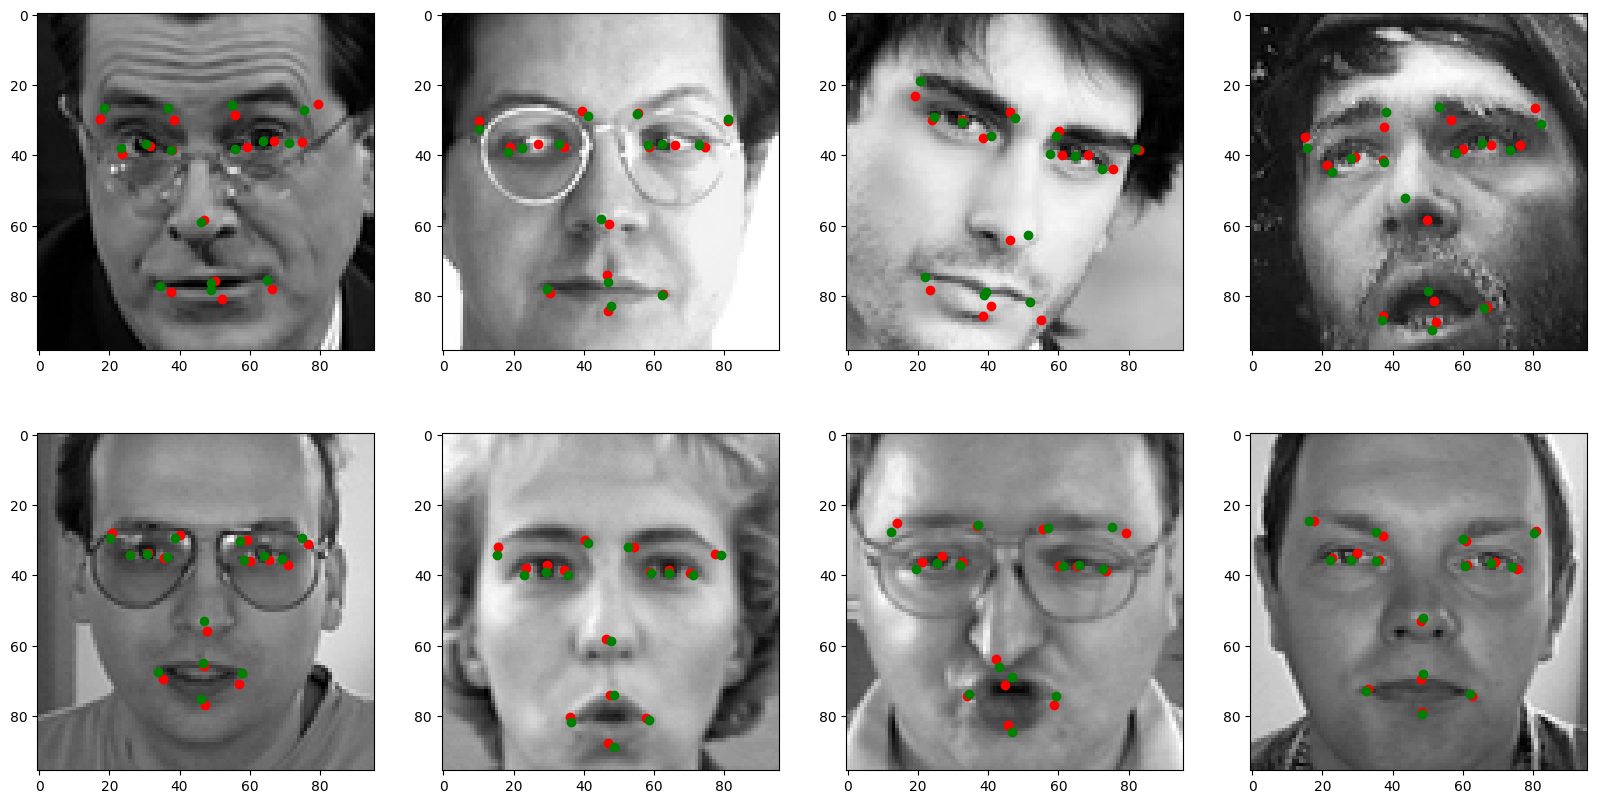

In [106]:
# Facial Keypoints 표시

plt.figure(figsize = (20, 10))
for idx in range(8):
  plt.subplot(2, 4, idx+1)
  plt.imshow(x_val[idx].reshape(96, 96), cmap = 'gray')
  for j in range(1, 31, 2):
    plt.plot(y_pred[idx][j-1], y_pred[idx][j], 'ro')
    plt.plot(y_val[idx][j-1], y_val[idx][j], 'go')
plt.show()